<a href="https://colab.research.google.com/github/AIREheart/Computational-Neuroscience/blob/main/BertTakesaBoW/workingmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers


In [ ]:
from google.colab import files
data = files.upload()

Saving NLP_training_data.xlsx to NLP_training_data.xlsx


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm


# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data (1).xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()



# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.encode(sent, add_special_tokens=True) for sent in sentences]

# Padding
max_len = max([len(sent) for sent in tokenized_texts])
padded_tokenized_texts = torch.tensor([sent + [0]*(max_len-len(sent)) for sent in tokenized_texts])

# Create dataset
class ClassificationDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'text': self.texts[idx],
            'label': self.labels[idx]
        }

dataset = ClassificationDataset(padded_tokenized_texts, labels)

# Split data into train and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        optimizer.zero_grad()
        inputs = batch['text'].to(device)
        labels = batch['label'].to(device)
        outputs = model(inputs)[0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        inputs = batch['text'].to(device)
        labels = batch['label'].to(device)
        outputs = model(inputs)[0]
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_true, y_pred))


Missing values indices: [537, 592, 598, 599, 645, 1488, 1569, 1625, 1626, 1815, 2432, 2735, 3009, 3010, 3011, 3185, 3338, 3875, 3949, 4031, 4207, 4208, 4209, 4446, 4469, 4507, 4610, 4785, 4786, 4787, 4788, 5721, 5776, 5777, 5778, 5779, 5780, 6038, 6143, 6436, 7083, 7195, 7196, 7197, 7379, 7657, 7883, 7894, 7909, 7910, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8362, 8363, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8386, 8387, 8388, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8403, 8404, 8405, 8406, 8407, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8423, 8424, 8426, 8427, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8438, 8439, 8440, 8441, 8442, 8444]


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3:   0%|          | 0/828 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'to'

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data (1).xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")
print(sentences[0])
print(sentences[1])


# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

print(labels)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.encode(sent, add_special_tokens=True) for sent in sentences]

# Padding
max_len = max([len(sent) for sent in tokenized_texts])
padded_tokenized_texts = [sent + [0]*(max_len-len(sent)) for sent in tokenized_texts]

# Create dataset
class ClassificationDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'text': self.texts[idx],
            'label': self.labels[idx]
        }

dataset = ClassificationDataset(padded_tokenized_texts, labels)

# Split data into train and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        print(f"type is  {type(batch['text'])}")
        optimizer.zero_grad()
        inputs = torch.tensor([item for sublist in batch['text'] for item in sublist], dtype=torch.long).to(device)
#torch.tensor(batch['text'], dtype=torch.long).to(device)

        labels = label_encoder.fit_transform(labels)
        #labels = torch.tensor(batch['label'], dtype=torch.long).to(device)
        #torch.tensor(batch['label'], dtype=torch.long).to(device)  # Ensure labels are converted to long tensors
        outputs = model(inputs)[0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        inputs = torch.tensor(batch['text']).to(device)
        labels = torch.tensor(batch['label'], dtype=torch.long).to(device)  # Ensure labels are converted to long tensors
        outputs = model(inputs)[0]
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_true, y_pred))


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm

# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data (1).xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.encode(sent, add_special_tokens=True) for sent in sentences]

print(tokenized_texts)

# Padding
max_len = max([len(sent) for sent in tokenized_texts])
padded_tokenized_texts = [sent + [0]*(max_len-len(sent)) for sent in tokenized_texts]

# Convert to tensors
padded_tokenized_texts = torch.tensor(padded_tokenized_texts, dtype=torch.long)
labels = [int(label) for label in labels]#torch.tensor(labels, dtype=torch.long)

# Create dataset
class ClassificationDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'text': self.texts[idx],
            'label': self.labels[idx]
        }

dataset = ClassificationDataset(padded_tokenized_texts, labels)

# Split data into train and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

# Define the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        optimizer.zero_grad()
        inputs = batch['text'].to(device)
        labels = batch['label'].to(device)
        outputs = model(inputs)[0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        inputs = batch['text'].to(device)
        labels = batch['label'].to(device)
        outputs = model(inputs)[0]
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_true, y_pred))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load and Preprocess Data
data = pd.read_excel('/content/NLP_training_data.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
#labels = data['Sign or symptom'].apply(lambda x: x.split(',')).tolist()  # Assuming labels are comma-separated

# Clean the data: Remove rows with missing 'labels'
data = data.dropna(subset=['Sentence'])

data = data.dropna(subset=['Sign or symptom'])

# Convert labels to list of strings
data['Sign or symptom'] = data['Sign or symptom'].astype(str)

# Split the labels by comma and convert to list
data['Sign or symptom'] = data['Sign or symptom'].apply(lambda x: x.split(','))

sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()


# Step 2: Feature Extraction (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Step 3: Convert labels to binary representation
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)
print(y)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

#y_train = np.array(y_train)
#y_train = np.vectorize(lambda x: ','.join(x))(y_train)
#print(y_train.shape)


# Step 4: Model Training
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Predictions
# Assuming new_data is a list of new sentences
new_data = ["New sentence 1", "New sentence 2"]
X_new = vectorizer.transform(new_data)
predictions = classifier.predict(X_new)
print("Predictions for new data:")
print(predictions)


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.48      0.64        29
           2       1.00      0.46      0.63        24
           3       0.00      0.00      0.00        11
           4       1.00      0.52      0.69        44
           5       0.00      0.00      0.00        11
           6       1.00      0.06      0.11        17
           7       1.00      0.24      0.38        21
           8       0.00      0.00      0.00        15
           9       1.00      0.16      0.27        32
          10       0.95      0.41      0.57        44
          11       1.00      0.18      0.30        17
          12       1.00      0.17 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions for new data:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load and Preprocess Data
data = pd.read_excel('/content/NLP_training_data.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
#labels = data['Sign or symptom'].apply(lambda x: x.split(',')).tolist()  # Assuming labels are comma-separated

# Clean the data: Remove rows with missing 'labels'
data = data.dropna(subset=['Sentence'])

data = data.dropna(subset=['Sign or symptom'])

# Convert labels to list of strings
data['Sign or symptom'] = data['Sign or symptom'].astype(str)

# Split the labels by comma and convert to list
data['Sign or symptom'] = data['Sign or symptom'].apply(lambda x: x.split(','))

sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()


print(sentences)

# Step 2: Feature Extraction (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Step 3: Convert labels to binary representation
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(labels)
print(y)

# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(y_train)

#y_train = np.array(y_train)
#y_train = np.vectorize(lambda x: ','.join(x))(y_train)
#print(y_train.shape)


# Step 4: Model Training
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Predictions
# Assuming new_data is a list of new sentences
new_data = ["New sentence 1", "New sentence 2"]
X_new = vectorizer.transform(new_data)
predictions = classifier.predict(X_new)
print("Predictions for new data:")
print(predictions)


['14-6: the patient was admitted to a home for the elderly', '14-9: the patient was admitted to a nursing home', '16-11: evaluation of the patients first two months in nursing home: the patient wanted to go home quiet often', '1967: She went to a home for mentally handicapped people', '1974: The patient was moved to a adapted house', '1983: November: the patient was admitted to a nursing home', '1986: September: the patient moved to a serviceflat', '1986: The patient was admitted to a nursing home', '1987: February: the patient was admitted to a nursing home', '1988: October: the patient was admitted to a nursing home to take the pressure of her husband', '1988: She was administered to a nursing home at the age of 97', '1988: The patient was admitted in a nursing home', '1989: In March the patient was admitted in a nursing home', '1990: May: the patient was admitted to a nursing home', '1991: August: The patient was admitted to a nursing home', '1992: The patient was admitted in a new 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predictions for new data:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data (1).xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()

# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()


# Step 1: Load and Preprocess Data
#data = pd.read_excel('/content/NLP_training_data (1).xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
#sentences = data['Sentence'].tolist()
#labels = data['Sign or symptom'].tolist()
print(sentences[0])
print(type(sentences))

# Step 2: Tokenization
tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract')
tokenized_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

print(tokenized_inputs)
print(type(tokenized_inputs))
#print(tokenized_inputs.shape)


# Step 3: Encode Labels
label_list = sorted(list(set(label for sublist in labels for label in sublist)))
label2id = {label: i for i, label in enumerate(label_list)}
num_labels = len(label_list)

# Convert labels to multi-hot encoded format
encoded_labels = []
for label_set in labels:
    encoded_label = [0] * num_labels
    for label in label_set:
        encoded_label[label2id[label]] = 1
    encoded_labels.append(encoded_label)

# Convert to PyTorch tensors
labels_tensor = torch.tensor(encoded_labels, dtype=torch.float)

print("Shape of tokenized inputs:", tokenized_inputs['input_ids'].shape)
print("Number of labels:", len(labels))

# Step 4: Split Data
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    tokenized_inputs, labels_tensor, test_size=0.2, random_state=42
)

# Step 5: Model Configuration
model = BertForSequenceClassification.from_pretrained(
    'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract',
    num_labels=num_labels
)

# Step 6: Fine-Tuning
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Fine-tuning loop
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    inputs = {k: v.to(device) for k, v in train_inputs.items()}
    labels = train_labels.to(device)
    outputs = model(**inputs, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Step 7: Evaluation
model.eval()
test_inputs = {k: v.to(device) for k, v in test_inputs.items()}
test_labels = test_labels.to(device)
with torch.no_grad():
    outputs = model(**test_inputs)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels.cpu().numpy(), thresholded_predictions))

# Step 8: Prediction
# Assuming new_sentences is a list of new sentences
new_sentences = ["New sentence 1", "New sentence 2"]
tokenized_new_sentences = tokenizer(new_sentences, padding=True, truncation=True, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**tokenized_new_sentences)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Predictions for new data:")
    print(thresholded_predictions)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Missing values indices: [537, 592, 598, 599, 645, 1488, 1569, 1625, 1626, 1815, 2432, 2735, 3009, 3010, 3011, 3185, 3338, 3875, 3949, 4031, 4207, 4208, 4209, 4446, 4469, 4507, 4610, 4785, 4786, 4787, 4788, 5721, 5776, 5777, 5778, 5779, 5780, 6038, 6143, 6436, 7083, 7195, 7196, 7197, 7379, 7657, 7883, 7894, 7909, 7910, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8362, 8363, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8386, 8387, 8388, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8403, 8404, 8405, 8406, 8407, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8423, 8424, 8426, 8427, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8438, 8439, 8440, 8441, 8442, 8444]
14-6: the patient was admitted to a home for the elderly
<class 'list'>
{'input_ids': tensor([[   

ValueError: Found input variables with inconsistent numbers of samples: [3, 8277]

In [ ]:
import pandas as pd ####current biobert model
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()


# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()
print(labels)


# Convert labels to list of strings
data['Sign or symptom'] = data['Sign or symptom'].astype(str)

# Split the labels by comma and convert to list
data['Sign or symptom'] = data['Sign or symptom'].apply(lambda x: x.split(','))

sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()
print(labels)

# Step 2: Tokenization
tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract')

# Tokenize sentences
tokenized_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Step 3: Encode Labels
# Convert labels to multi-hot encoded format
label_list = sorted(list(set(label for sublist in labels for label in sublist)))
label2id = {label: i for i, label in enumerate(label_list)}
num_labels = len(label_list)
print(label_list)
encoded_labels = []
for label_set in labels:
    encoded_label = [0] * num_labels
    for label in label_set:
        encoded_label[label2id[label]] = 1
    encoded_labels.append(encoded_label)

# Convert to PyTorch tensors
labels_tensor = torch.tensor(encoded_labels, dtype=torch.float)

# Step 4: Split Data
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    tokenized_inputs['input_ids'], labels_tensor, test_size=0.2, random_state=42
)
print(test_inputs.size())

# Step 5: Model Configuration
model = BertForSequenceClassification.from_pretrained(
    'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract',
    num_labels=num_labels
)

# Step 6: Fine-Tuning
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Fine-tuning loop
batch_size = 33

epochs = 3
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    for i in range(0, len(train_inputs[:100]), batch_size):
      inputs = train_inputs[i:(i+batch_size)].to(device)  # Move the tensor directly to the device
      labels = train_labels[i:(i+batch_size)].to(device)
      outputs = model(input_ids=inputs, labels=labels)  # Pass the inputs as input_ids
      loss = outputs.loss
      loss.backward()
      optimizer.step()
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


# Step 7: Evaluation
model.eval()
test_inputs = test_inputs.to(device)
test_labels = test_labels.to(device)

#for i in range(0, len(test_inputs[:20]), batch_size):
with torch.no_grad():
    outputs = model(test_inputs[:20])
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels[:20].cpu().numpy(), thresholded_predictions))
#    print(" Accuracy Score -> ",accuracy_score(predictions, test_inputs)*100)

# Step 8: Prediction
# Assuming new_sentences is a list of new sentences
new_sentences = ["New sentence 1", "New sentence 2"]
tokenized_new_sentences = tokenizer(new_sentences, padding=True, truncation=True, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**tokenized_new_sentences)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Predictions for new data:")
    print(thresholded_predictions)


Missing values indices: [537, 592, 598, 599, 645, 1488, 1569, 1625, 1626, 1815, 2432, 2735, 3009, 3010, 3011, 3185, 3338, 3875, 3949, 4031, 4207, 4208, 4209, 4446, 4469, 4507, 4610, 4785, 4786, 4787, 4788, 5721, 5776, 5777, 5778, 5779, 5780, 6038, 6143, 6436, 7083, 7195, 7196, 7197, 7379, 7657, 7883, 7894, 7909, 7910, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8362, 8363, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8386, 8387, 8388, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8403, 8404, 8405, 8406, 8407, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8423, 8424, 8426, 8427, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8438, 8439, 8440, 8441, 8442, 8444]
['Admission to nursing home', 'Admission to nursing home', 'Admission to nursing home', 'Admission

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['Admission to nursing home', 'Aggressive behavior', 'Agitation', 'Amnesia', 'Anxiety', 'Apathy / inertia', 'Aphasia', 'Apraxia', 'Ataxia', 'Balance problems', 'Bradykinesia', 'Bradyphrenia', 'Cachexia', 'Changed behavior/personality', 'Changed moods or emotions', 'Cognitive decline', 'Communication problems', 'Compulsive behavior', 'Concentration problems', 'Confabulations', 'Confusion', 'Constipation', 'Day care', 'Day/night rhythm disturbances', 'Declined / deteriorated health', 'Decreased (fine) motor skills', 'Delirium', 'Delusions', 'Dementia', 'Depressed mood', 'Disinhibition', 'Disorientation', 'Dysarthria', 'Executive function disorders', 'Facial masking', 'Fasciculations', 'Fatique', 'Façade behavior', 'Forgetfulness', 'Frequent falls', 'Frontal release signs', 'Hallucinations', 'Headache / migraine', 'Headturning sign', 'Hearing problems', 'Help in ADL', 'Hyperorality', 'Hyperreflexia and other pathological reflexes', 'Impaired comprehension', 'Impaired recognition', 'Imprin

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 0.7194727063179016
Epoch 1/3, Loss: 0.6155891418457031
Epoch 1/3, Loss: 0.5866878032684326
Epoch 1/3, Loss: 0.5647380948066711
Epoch 2/3, Loss: 0.546613872051239
Epoch 2/3, Loss: 0.5249282121658325
Epoch 2/3, Loss: 0.5080662369728088
Epoch 2/3, Loss: 0.48764047026634216
Epoch 3/3, Loss: 0.4741319715976715
Epoch 3/3, Loss: 0.46035271883010864
Epoch 3/3, Loss: 0.44576555490493774
Epoch 3/3, Loss: 0.433549165725708
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()


# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()
print(labels)


# Convert labels to list of strings
data['Sign or symptom'] = data['Sign or symptom'].astype(str)

# Split the labels by comma and convert to list
data['Sign or symptom'] = data['Sign or symptom'].apply(lambda x: x.split(','))

sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()
print(labels)

# Shuffle the data
sentences, labels = shuffle(sentences, labels, random_state=42)

# Sample 1000 random indices
num_samples = 4000
random_indices = torch.randperm(len(sentences))[:num_samples]

# Select 1000 random samples
sentences_sampled = [sentences[i] for i in random_indices]
labels_sampled = [labels[i] for i in random_indices]

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract')

# Tokenize sentences
tokenized_inputs = tokenizer(sentences_sampled, padding=True, truncation=True, return_tensors="pt")

# Encode labels
label_list = sorted(list(set(label for sublist in labels_sampled for label in sublist)))
label2id = {label: i for i, label in enumerate(label_list)}
num_labels = len(label_list)

encoded_labels = []
for label_set in labels_sampled:
    encoded_label = [0] * num_labels
    for label in label_set:
        encoded_label[label2id[label]] = 1
    encoded_labels.append(encoded_label)

labels_tensor = torch.tensor(encoded_labels, dtype=torch.float)

# Initialize model
model = BertForSequenceClassification.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract',
                                                      num_labels=num_labels)

# Train the model on the sampled data...

# Step 4: Split Data
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    tokenized_inputs['input_ids'], labels_tensor, test_size=0.2, random_state=42
)
print(test_inputs.size())

# Step 5: Model Configuration
model = BertForSequenceClassification.from_pretrained(
    'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract',
    num_labels=num_labels
)


# Step 6: Fine-Tuning
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Fine-tuning loop
batch_size = 33

epochs = 1
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    for i in range(0, len(train_inputs), batch_size):
      inputs = train_inputs[i:(i+batch_size)].to(device)  # Move the tensor directly to the device
      labels = train_labels[i:(i+batch_size)].to(device)
      outputs = model(input_ids=inputs, labels=labels)  # Pass the inputs as input_ids
      loss = outputs.loss
      loss.backward()
      optimizer.step()
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


# Step 7: Evaluation
model.eval()
test_inputs = test_inputs.to(device)
test_labels = test_labels.to(device)

#for i in range(0, len(test_inputs[:20]), batch_size):
with torch.no_grad():
    outputs = model(test_inputs)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels.cpu().numpy(), thresholded_predictions))


Missing values indices: [537, 592, 598, 599, 645, 1488, 1569, 1625, 1626, 1815, 2432, 2735, 3009, 3010, 3011, 3185, 3338, 3875, 3949, 4031, 4207, 4208, 4209, 4446, 4469, 4507, 4610, 4785, 4786, 4787, 4788, 5721, 5776, 5777, 5778, 5779, 5780, 6038, 6143, 6436, 7083, 7195, 7196, 7197, 7379, 7657, 7883, 7894, 7909, 7910, 8327, 8328, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8362, 8363, 8366, 8367, 8368, 8369, 8370, 8371, 8372, 8373, 8374, 8375, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8386, 8387, 8388, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8403, 8404, 8405, 8406, 8407, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8423, 8424, 8426, 8427, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8438, 8439, 8440, 8441, 8442, 8444]
['Admission to nursing home', 'Admission to nursing home', 'Admission to nursing home', 'Admission

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


torch.Size([800, 74])


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1, Loss: 0.6961480975151062
Epoch 1/1, Loss: 0.6266775727272034
Epoch 1/1, Loss: 0.5958848595619202
Epoch 1/1, Loss: 0.5713373422622681
Epoch 1/1, Loss: 0.546966552734375
Epoch 1/1, Loss: 0.5274403095245361
Epoch 1/1, Loss: 0.5092809200286865
Epoch 1/1, Loss: 0.493169367313385
Epoch 1/1, Loss: 0.47973817586898804
Epoch 1/1, Loss: 0.466854453086853
Epoch 1/1, Loss: 0.45307400822639465
Epoch 1/1, Loss: 0.43838128447532654
Epoch 1/1, Loss: 0.4255080223083496
Epoch 1/1, Loss: 0.41456130146980286
Epoch 1/1, Loss: 0.40149930119514465
Epoch 1/1, Loss: 0.39105015993118286
Epoch 1/1, Loss: 0.3756641447544098
Epoch 1/1, Loss: 0.36242157220840454
Epoch 1/1, Loss: 0.352992981672287
Epoch 1/1, Loss: 0.3405582904815674
Epoch 1/1, Loss: 0.3308730125427246
Epoch 1/1, Loss: 0.31760546565055847
Epoch 1/1, Loss: 0.307973176240921
Epoch 1/1, Loss: 0.3021429777145386
Epoch 1/1, Loss: 0.2890770733356476
Epoch 1/1, Loss: 0.28524067997932434
Epoch 1/1, Loss: 0.2754185199737549
Epoch 1/1, Loss: 0.25905

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

In [ ]:
from torch import nn

with torch.no_grad():
    outputs = model(test_inputs)
    logits = outputs.logits
    predictions = torch.nn.functional.gelu(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels.cpu().numpy(), thresholded_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        14
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

In [ ]:
from torch import nn
relu = nn.functional.relu

with torch.no_grad():
    outputs = model(test_inputs[:100])
    logits = outputs.logits
    predictions = torch.nn.functional.prelu(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels[:100].cpu().numpy(), thresholded_predictions))



TypeError: prelu() missing 1 required positional arguments: "weight"

In [ ]:
torch.nn.functional.leaky_relu
torch.nn.functional.tanh
torch.nn.functional.sigmoid
torch.nn.functional.softmax ?



In [ ]:
import pandas as pd
import torch
#from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load model directly
from transformers import AutoTokenizer, BertForMultiLabelSequenceClassification


# Load and preprocess data
data = pd.read_excel('/content/NLP_training_data.xlsx')  # Replace 'your_dataset.xlsx' with the path to your Excel file
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()
#labels = data['Sign or symptom'].apply(lambda x: x.split(',')).tolist()  # Assuming labels are comma-separated


# Check for missing values in sentences
missing_values = [i for i, sentence in enumerate(sentences) if pd.isna(sentence)]

# Print the missing values indices
print(f"Missing values indices: {missing_values}")

# Drop rows with missing values
data = data.dropna()

# Update sentences and labels lists
sentences = data['Sentence'].tolist()
labels = data['Sign or symptom'].tolist()



# Step 2: Tokenization
#tokenizer = BertTokenizer.from_pretrained('microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract')
tokenizer = AutoTokenizer.from_pretrained("NND-project/Clinical_History_Mekkes_PubmedBert")


# Tokenize sentences
tokenized_inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")




# Step 3: Encode Labels
# Convert labels to multi-hot encoded format
label_list = sorted(list(set(label for sublist in labels for label in sublist)))
label2id = {label: i for i, label in enumerate(label_list)}
num_labels = len(label_list)

encoded_labels = []
for label_set in labels:
    encoded_label = [0] * num_labels
    for label in label_set:
        encoded_label[label2id[label]] = 1
    encoded_labels.append(encoded_label)

# Convert to PyTorch tensors
labels_tensor = torch.tensor(encoded_labels, dtype=torch.float)

# Step 4: Split Data
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    tokenized_inputs['input_ids'], labels_tensor, test_size=0.2, random_state=42
)
print(test_inputs.size())

# Step 5: Model Configuration
model = BertForMultiLabelSequenceClassification.from_pretrained("NND-project/Clinical_History_Mekkes_PubmedBert")

#model = BertForSequenceClassification.from_pretrained(
 #   'microsoft/BiomedNLP-BiomedBERT-base-uncased-abstract',
  #  num_labels=num_labels)

# Step 6: Fine-Tuning
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Fine-tuning loop
batch_size = 33

epochs = 4
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    for i in range(0, len(train_inputs[:100]), batch_size):
      inputs = train_inputs[i:(i+batch_size)].to(device)  # Move the tensor directly to the device
      labels = train_labels[i:(i+batch_size)].to(device)
      outputs = model(input_ids=inputs, labels=labels)  # Pass the inputs as input_ids
      loss = outputs.loss
      loss.backward()
      optimizer.step()
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")



# Step 7: Evaluation
model.eval()
test_inputs = test_inputs.to(device)
test_labels = test_labels.to(device)

#for i in range(0, len(test_inputs[:20]), batch_size):
with torch.no_grad():
    outputs = model(test_inputs)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Classification Report:")
    print(classification_report(test_labels.cpu().numpy(), thresholded_predictions))

# Step 8: Prediction
# Assuming new_sentences is a list of new sentences
new_sentences = ["New sentence 1", "New sentence 2"]
tokenized_new_sentences = tokenizer(new_sentences, padding=True, truncation=True, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**tokenized_new_sentences)
    logits = outputs.logits
    predictions = torch.sigmoid(logits).cpu().numpy()
    thresholded_predictions = (predictions > 0.5).astype(int)
    print("Predictions for new data:")
    print(thresholded_predictions)


ImportError: cannot import name 'BertForMultiLabelSequenceClassification' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [ ]:
import matplotlib.pyplot as plt

[0.7332488894462585, 0.6504114866256714, 0.6129541397094727, 0.5867233276367188, 0.5580544471740723, 0.5356422066688538, 0.5200137495994568, 0.5052615404129028, 0.4971252679824829, 0.4808945953845978, 0.4630451202392578, 0.45122817158699036, 0.4394058585166931, 0.42665567994117737, 0.41514086723327637, 0.40128448605537415, 0.3917183578014374, 0.3796599507331848, 0.3687324821949005, 0.35743820667266846, 0.34460657835006714, 0.3325856328010559, 0.32388824224472046, 0.3114366829395294, 0.3057998716831207]


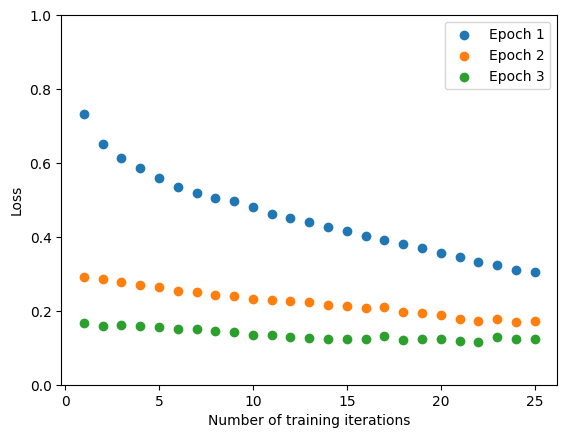

In [ ]:
epoch1 = [.7332488894462585, 0.6504114866256714, 0.6129541397094727,0.5867233276367188 ,0.5580544471740723, 0.5356422066688538 ,0.5200137495994568,0.5052615404129028,
          0.4971252679824829 ,0.4808945953845978 ,0.4630451202392578 , 0.45122817158699036 , 0.4394058585166931,0.42665567994117737,0.41514086723327637,
          0.40128448605537415 ,0.3917183578014374, 0.3796599507331848,0.3687324821949005,0.35743820667266846,0.34460657835006714,
          0.3325856328010559,0.32388824224472046 ,0.3114366829395294,0.3057998716831207]
epoch2 = [0.292189359664917,0.28491392731666565,0.27805307507514954, 0.26907992362976074, 0.26481372117996216, 0.25455737113952637, 0.25109121203422546,
 0.24345865845680237 , 0.23915405571460724,0.23193159699440002 , 0.22897814214229584, 0.22707809507846832 ,0.22277475893497467, 0.21600185334682465,0.21215695142745972,
 0.2081219106912613, 0.20912368595600128, 0.19661857187747955, 0.19279217720031738, 0.18812179565429688, 0.1782652735710144,0.17368735373020172,0.1780320554971695,0.17102336883544922, 0.1718408316373825 ]

epoch3 = [ 0.16809481382369995 , 0.1592692732810974 , 0.1623426228761673 , 0.15830779075622559 , 0.1558179259300232 ,
          0.15102903544902802 , 0.15123984217643738 , 0.1445545256137848 , 0.14261583983898163 , 0.13391177356243134 , 0.1335887908935547 ,
          0.13045759499073029 , 0.12750309705734253 , 0.12455838918685913 , 0.12402969598770142 , 0.12396501004695892 , 0.13053497672080994 ,
          0.12054320424795151 , 0.12343205511569977 , 0.12460624426603317 , 0.11811903864145279 , 0.1155560091137886 , 0.1286766231060028 ,
          0.12245243787765503 , 0.12459712475538254]


print(epoch1)
plt.xlabel('Number of training iterations')
plt.ylim(0,1)
plt.ylabel('Loss')
plt.scatter(range(1,26), epoch1, label = 'Epoch 1')
plt.scatter(range(1,26), epoch2, label = 'Epoch 2')
plt.scatter(range(1,26), epoch3, label = 'Epoch 3')


plt.legend()

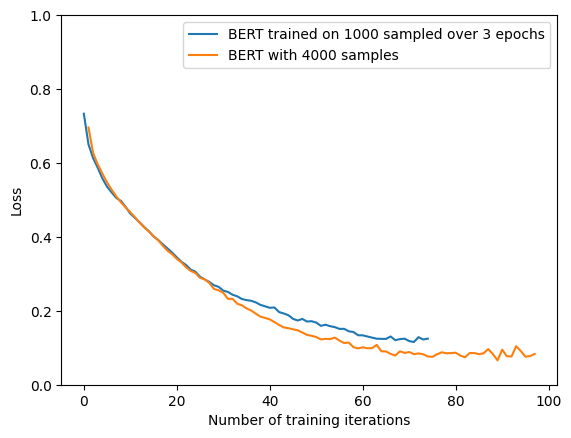

In [ ]:
e4000 = [0.696148097515106,0.626677572727203,0.59588485956192,0.571337342262268,0.546966552734375,0.527440309524536,0.509280920028686,0.493169367313385,0.479738175868988,0.466854453086853,0.453074008226394,0.438381284475326,0.425508022308349,0.414561301469802,0.401499301195144,0.391050159931182,0.375664144754409,0.362421572208404,0.352992981672287,0.340558290481567,0.330873012542724,0.317605465650558,0.307973176240921,0.302142977714538,0.289077073335647,0.285240679979324,0.275418519973754,0.259058147668838,0.255448520183563,0.248658925294876,0.232398182153701,0.232371643185615,0.219193845987319,0.215035364031791,0.206629797816276,0.200853794813156,0.192131042480468,0.184253707528114,0.180676519870758,0.176935330033302,0.16959224641323,0.161770492792129,0.155145063996315,0.152919366955757,0.149942681193351,0.147312030196189,0.141349464654922,0.134779468178749,0.132349982857704,0.129117280244827,0.122504599392414,0.124105729162693,0.123482637107372,0.127521157264709,0.119330286979675,0.112791962921619,0.114154331386089,0.101579159498214,0.0982876420021057,0.101210810244083,0.0988615080714225,0.0989313572645187,0.107804916799068,0.0905650630593299,0.0900354161858558,0.0833611562848091,0.0789754316210746,0.0905503332614898,0.0860134363174438,0.0884679108858108,0.0827197283506393,0.0846481397747993,0.0823986306786537,0.0764499306678772,0.0756030231714248,0.0824170112609863,0.087768331170082,0.0850093439221382,0.085639514029026,0.0865151211619377,0.0789871290326118,0.0742294341325759,0.0857602432370185,0.0856477245688438,0.0825392007827758,0.0851361975073814,0.0964938774704933,0.0828234627842903,0.0659425407648086,0.0947390124201774,0.0770812556147575,0.0761835351586341,0.104187034070491,0.0911424830555915,0.0759193003177642,0.0775056406855583,0.083241194486618]


plt.xlabel('Number of training iterations')
plt.ylim(0,1)
plt.ylabel('Loss')

plt.plot( epoch1+epoch2+epoch3, label = 'BERT trained on 1000 sampled over 3 epochs')
plt.plot(range(1,98), e4000, label = 'BERT with 4000 samples')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib
import sklearn
#from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
# Load model directly
#from transformers import AutoTokenizer, BertForMultiLabelSequenceClassification

import matplotlib.pyplot as plt
from torch import nn
relu = nn.functional.relu
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [ ]:
sklearn.__version__

'1.2.2'